In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarah20hesham","key":"f87498e1ca65320c165d2df485b18f50"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 60% 9.00M/15.1M [00:00<00:00, 55.9MB/s]
100% 15.1M/15.1M [00:00<00:00, 73.6MB/s]


In [8]:
import keras
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
import PIL

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
!unzip "/content/brain-mri-images-for-brain-tumor-detection.zip"

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

In [61]:
import os
 
# assign directory
directory = '/content/no'
no=[]
# iterate over files in
# that directory
for filename in os.scandir(directory):
    if filename.is_file():
        no.append(filename.path)

len(no)

98

In [62]:
import os
 
# assign directory
directory = '/content/yes'
yes=[]
# iterate over files in
# that directory
for filename in os.scandir(directory):
    if filename.is_file():
        yes.append(filename.path)

len(yes)

155

In [74]:
x_train = no[:80] + yes[:130]

In [64]:
x_test = no[80:] + yes[130:]

In [65]:
y_train = []

for i in range(80):
  y_train.append(0)
for i in range(130):
  y_train.append(1)

len(y_train)

210

In [66]:
y_test =[] 

for i in range(18):
  y_test.append(0)
for i in range(25):
  y_test.append(1)

len(y_test)

43

In [75]:
# Import the necessary libraries
import cv2
from numpy import asarray
import numpy as np
# load the image and convert into 
# numpy array
x_train_final =[]
for i in x_train:
       img =cv2.imread(i,0)
       img=cv2.resize(img, (100, 100)) 
       x_train_final.append(np.array(img).astype(np.uint8))
   
# data
print(x_train_final)

[array([[252, 253, 240, ..., 247, 254, 253],
       [250, 191,  30, ...,  37, 207, 254],
       [211,  22,   0, ...,  11,  17, 225],
       ...,
       [203,  35,   3, ...,   5,  27, 224],
       [240, 184,  35, ...,  29, 187, 251],
       [255, 248, 222, ..., 239, 253, 254]], dtype=uint8), array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[16, 16, 16, ..., 16, 16, 16],
       [16, 1

In [79]:
# Import the necessary libraries
import cv2
from numpy import asarray
import numpy as np
# load the image and convert into 
# numpy array
x_test_final =[]
for i in x_test:
       img =cv2.imread(i,0)
       img=cv2.resize(img, (100, 100)) 
       x_test_final.append(np.array(img).astype(np.uint8))
   
# data
print(x_test_final)

[array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8), array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 3, 3],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 1, 1]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8), array([[ 0,  0, 11, ..., 14, 11,  0],
       [ 0,  0, 12, ..., 12, 12,  0],
       [ 0,  0, 12, ..., 13, 14,  0],
       ..

In [80]:
print(len(x_train_final))
print(len(x_test_final))

210
43


In [94]:
import numpy as np 
x_train_final=np.array(x_train_final)
x_test_final=np.array(x_test_final)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [88]:
print(x_train_final.shape)
print(x_test_final.shape)

(210, 100, 100)
(43, 100, 100)


In [89]:
# normlize the data
x_train = x_train_final/255.0
x_test  = x_test_final/255.0

In [153]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(100,100,1)))
model.add(Conv2D(filters=6,kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=6,kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=6,kernel_size = 3,strides = (2,2),padding = 'same',activation = 'relu'))
model.add(Conv2D(filters=7,kernel_size = 3,strides = (2,2),padding = 'same',activation = 'relu'))


model.add(Flatten())
model.add(Dense(84,activation = 'relu'))
model.add(Dense(70,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 50, 50, 6)         60        
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 25, 25, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 13, 13, 6)         330       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 6, 6, 6)          0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 3, 3, 6)           330       
                                                                 
 conv2d_50 (Conv2D)          (None, 2, 2, 7)         

In [154]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy']) 

In [155]:
results= model.fit(x_train,y_train,epochs=100,batch_size=30,validation_data=(x_test, y_test),shuffle=True)

Epoch 1/100
7/7 [==============================] - 24s 71ms/step - loss: 0.6907 - accuracy: 0.6048 - val_loss: 0.6882 - val_accuracy: 0.5814
Epoch 2/100
7/7 [==============================] - 0s 40ms/step - loss: 0.6839 - accuracy: 0.6190 - val_loss: 0.6812 - val_accuracy: 0.5814
Epoch 3/100
7/7 [==============================] - 0s 41ms/step - loss: 0.6747 - accuracy: 0.6143 - val_loss: 0.6724 - val_accuracy: 0.5814
Epoch 4/100
7/7 [==============================] - 0s 39ms/step - loss: 0.6621 - accuracy: 0.6190 - val_loss: 0.6548 - val_accuracy: 0.5814
Epoch 5/100
7/7 [==============================] - 0s 41ms/step - loss: 0.6447 - accuracy: 0.6238 - val_loss: 0.6321 - val_accuracy: 0.6047
Epoch 6/100
7/7 [==============================] - 0s 40ms/step - loss: 0.6232 - accuracy: 0.6619 - val_loss: 0.5971 - val_accuracy: 0.7209
Epoch 7/100
7/7 [==============================] - 0s 40ms/step - loss: 0.5882 - accuracy: 0.7476 - val_loss: 0.5577 - val_accuracy: 0.7674
Epoch 8/100
7/7 [==

In [133]:
model.save("BrainTumor_CNN.h5")
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model
!cp "/content/BrainTumor_CNN.h5" "/content/drive/MyDrive/H5_Folders"
model=load_model('/content/BrainTumor_CNN.h5')

Mounted at /content/drive


In [136]:
y_pred=model.predict(x_test)

Text(0, 0.5, 'losses')

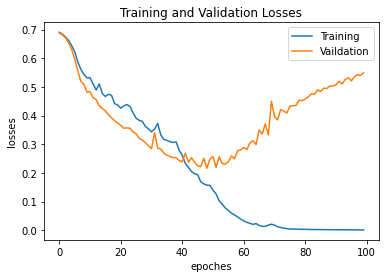

In [156]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

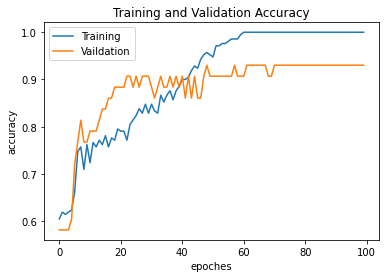

In [157]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [158]:
print(model.evaluate(x_test,y_test))

2/2 [==============================] - 0s 13ms/step - loss: 0.5491 - accuracy: 0.9302
[0.5491281747817993, 0.930232584476471]
